In [6]:
from modular_matrix import *
from transition_helpers import *
import numpy as np
from cycle_analysis import *
import matplotlib.pyplot as plt
from figure_grid import *

In [108]:
for k in range(2, 6):
    print(k, all_forward_cycles(k, 3, 3))

2 Counter({(4, 0): 480, (2, 0): 24, (1, 0): 8})
3 Counter({(8, 0): 19656, (1, 0): 27})
4 Counter({(8, 0): 131072, (4, 0): 130048, (2, 0): 960, (1, 0): 64})
5 Counter({(24, 0): 1875000, (12, 0): 78000, (1, 0): 125})


In [10]:
for k in range(2, 11):
    print(k, all_forward_cycles(k, 2, 2))

2 Counter({(2, 0): 12, (1, 0): 4})
3 Counter({(3, 1): 36, (2, 0): 18, (2, 1): 18, (1, 0): 9})
4 Counter({(4, 0): 128, (2, 0): 112, (1, 0): 16})
5 Counter({(4, 0): 500, (2, 0): 100, (1, 0): 25})
6 Counter({(3, 1): 792, (2, 0): 396, (2, 1): 72, (1, 0): 36})
7 Counter({(6, 0): 2058, (2, 0): 294, (1, 0): 49})
8 Counter({(8, 0): 2048, (4, 0): 1024, (2, 0): 960, (1, 0): 64})
9 Counter({(4, 2): 3888, (3, 1): 1296, (2, 0): 648, (3, 2): 486, (2, 1): 162, (1, 0): 81})
10 Counter({(4, 0): 8000, (2, 0): 1900, (1, 0): 100})


In [29]:
for k in range(2, 11):
    print(k, all_inverse_cycles(k, 2, 2))

2 Counter({(2, 0): 12, (1, 0): 4})
3 Counter({(0, 0): 78, (1, 0): 3})
4 Counter({(4, 0): 128, (2, 0): 112, (1, 0): 16})
5 Counter({(4, 0): 500, (2, 0): 100, (1, 0): 25})
6 Counter({(0, 0): 1248, (2, 0): 36, (1, 0): 12})
7 Counter({(6, 0): 2058, (2, 0): 294, (1, 0): 49})
8 Counter({(8, 0): 2048, (4, 0): 1024, (2, 0): 960, (1, 0): 64})
9 Counter({(0, 0): 6480, (2, 0): 54, (1, 0): 27})
10 Counter({(4, 0): 8000, (2, 0): 1900, (1, 0): 100})


In [85]:
roots = np.zeros((7,7))
for n in range(2, 9):
    for m in range(n, 9):
        A = standard_A(2, n, m)
        root = identity_root(A)
        roots[n-2][m-2] = root
        roots[m-2][n-2] = root
print(roots)

[[   2.   nan    6.   nan   14.   nan   14.]
 [  nan    4.   12.   nan   28.    8.   nan]
 [   6.   12.   nan   12.  126.   24.  126.]
 [  nan   nan   12.   nan   28.   nan   nan]
 [  14.   28.  126.   28.   14.   56.   nan]
 [  nan    8.   24.   nan   56.    8.   nan]
 [  14.   nan  126.   nan   nan   nan   14.]]


In [86]:
roots = np.zeros((7,7))
for n in range(2, 9):
    for m in range(n, 9):
        A = standard_A(3, n, m)
        root = identity_root(A, (10000 if n*m < 50 else 150000))
        roots[n-2][m-2] = root
        roots[m-2][n-2] = root
print(roots)

[[  nan   nan    8.   nan   26.   nan   nan]
 [  nan    8.   nan   nan  728.   80.   nan]
 [   8.   nan   nan   24.  728.   nan   72.]
 [  nan   nan   24.   nan   78.   nan   nan]
 [  26.  728.  728.   78.   26.   nan  234.]
 [  nan   80.   nan   nan   nan   80.   nan]
 [  nan   nan   72.   nan  234.   nan   nan]]


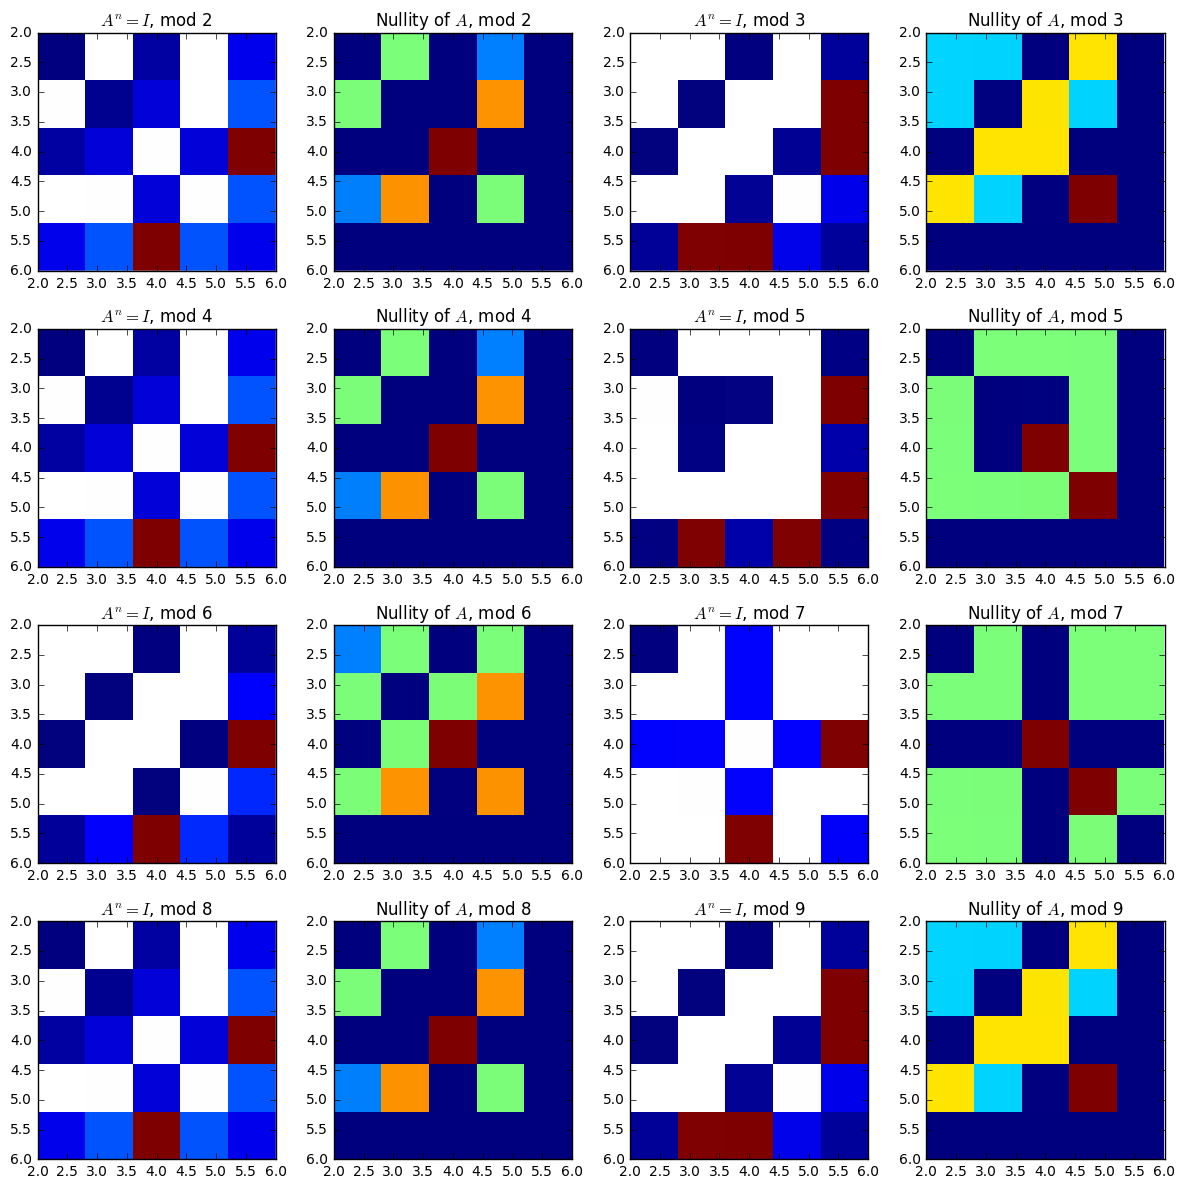

In [91]:
with figure_grid(4, 4) as grid:
    for k in range(2, 10):
        roots = np.zeros((5,5))
        nulls = np.zeros((5,5))
        for n in range(2, 7):
            for m in range(n, 7):
                A = standard_A(k, n, m)
                null = A.nullity()
                root = identity_root(A, 30000)
                roots[n-2][m-2] = root
                roots[m-2][n-2] = root
                nulls[n-2][m-2] = null
                nulls[m-2][n-2] = null
        grid.next_subplot()
        plt.title(r'$A^n = I$, mod {}'.format(k))
        plt.imshow(roots, interpolation='none', extent=[2,6,6,2])
        grid.next_subplot()
        plt.title(r'Nullity of $A$, mod {}'.format(k))
        plt.imshow(nulls, interpolation='none', extent=[2,6,6,2])